In [133]:
from matplotlib.axis import YAxis
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import math
import json

In [134]:
#Import rib.gg Data
df = pd.read_csv(r"C:\Users\Renzjordan\OneDrive\MiniProj\VALImpact\data\VCT-NA-2022-Stage-2-Challengers-ImpactEssentialPlayerData.csv")

In [135]:
#Set Attack Team Win target variable
df['ATKWin'] = 0
for i in range(0, len(df)):

    if(df.loc[i, 'attackingTeamNumber'] == df.loc[i, 'winningTeamNumber']):
        df.loc[i, 'ATKWin'] = 1

In [136]:
#Seperate Independent and Dependent Variables
indVars = df.drop(columns=['roundId_x', 'attackingTeamNumber', 'winningTeamNumber','ATKWin', 'playerId', 'assistants', 'victimId'])
depVar = df[['matchId_y', 'ATKWin']]

In [137]:
#Train on group stage
X_train = indVars[indVars['matchId_y'] < 71399].drop(columns=['matchId_y'])
Y_train = depVar[depVar['matchId_y'] < 71399].drop(columns=['matchId_y'])

X_test = indVars[indVars['matchId_y'] == 71399].drop(columns=['matchId_y'])
y_test = depVar[depVar['matchId_y'] == 71399].drop(columns=['matchId_y'])

In [138]:
#do Logisistic Regression
logreg = LogisticRegression()

logreg.fit(X_train, Y_train.values.ravel())

LogisticRegression()

In [139]:
#EG vs OPTC Ascent
print(df[df['matchId_y'] == 71399])

     matchId_y  roundId_x  attackingTeamNumber  roundTime  ATKAlive  DEFAlive  \
767      71399    1111222                    2     100000         5         5   
768      71399    1111223                    2     100000         5         5   
769      71399    1111224                    2     100000         5         5   
770      71399    1111224                    2      38858         5         4   
771      71399    1111224                    2      38658         5         3   
..         ...        ...                  ...        ...       ...       ...   
891      71399    1111238                    1     -23385         2         3   
892      71399    1111238                    1     -23701         2         2   
893      71399    1111238                    1     -23930         1         2   
894      71399    1111238                    1     -23948         1         1   
895      71399    1111238                    1     -35607         1         0   

     ATKLoadoutValue  DEFLo

In [140]:
#Transform Bomb Time from (100000 to -450000) -> (0 to 1)
def NormalizeData(data):
    # return (data - np.max(data)) / (np.min(data) - np.max(data))
    return (data - np.max(data)) / (-45000 - np.max(data))

In [141]:
#Set X-axis for graph (round + event time)
xAx = df[df['matchId_y'] == 71399]['roundId_x']-df[df['matchId_y'] == 71399]['roundId_x'][df[df['matchId_y'] == 71399].index[0]] +1 + NormalizeData(df[df['matchId_y'] == 71399]['roundTime'])


In [142]:
#Find index of round 13
halftime = xAx.loc[xAx==13].index[0] - xAx.loc[xAx==1].index[0]
#print(xAx.head(60))


In [143]:
#Get probability of [0, 1]
y_pred=logreg.predict_proba(X_test)
print((y_pred[56:62]))

[[0.03951793 0.96048207]
 [0.14333688 0.85666312]
 [0.33745506 0.66254494]
 [0.13261658 0.86738342]
 [0.04835635 0.95164365]
 [0.04709969 0.95290031]]


In [144]:
#Get probabilities for home team
if(df[df['matchId_y'] == 71399].iloc[0]['attackingTeamNumber'] == 1):
    firstHalf = [item[1] for item in y_pred[:halftime]]
    secHalf = [item[0] for item in y_pred[halftime:]]
else:
    firstHalf = [item[0] for item in y_pred[:halftime]]
    secHalf = [item[1] for item in y_pred[halftime:]]


In [145]:
#Sey y-axis for graph
yAx = firstHalf + secHalf
print(len(yAx))

129


In [146]:
#Get final round number
final = math.ceil(xAx.iloc[-1])

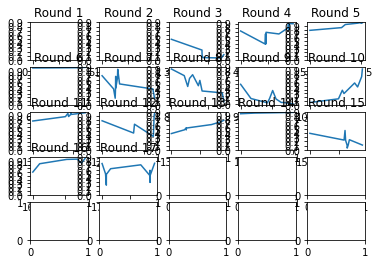

In [147]:
%matplotlib inline

#Set up enough plots for each round
figure, axis = plt.subplots(5, 5)

# Plot x, y for each round graph
round = 1
for i in range(5):
    for j in range(5):
        # print(xAx.loc[xAx==round].index[0])
        # print(xAx.loc[xAx.loc[xAx==round].index[0]:xAx.loc[xAx==round+1].index[0]])
        if(round!=final-1):
            # if(i==3 and j==2):
            #     print(xAx.loc[xAx.loc[xAx==round].index[0]:xAx.loc[xAx==round+1].index[0]-1])
            #     print(yAx[xAx.loc[xAx==round].index[0]-xAx.loc[xAx==1].index[0]:xAx.loc[xAx==round+1].index[0]-xAx.loc[xAx==1].index[0]])
            axis[i, j].plot(xAx.loc[xAx.loc[xAx==round].index[0]:xAx.loc[xAx==round+1].index[0]-1], yAx[xAx.loc[xAx==round].index[0]-xAx.loc[xAx==1].index[0]:xAx.loc[xAx==round+1].index[0]-xAx.loc[xAx==1].index[0]])
            axis[i, j].set_title("Round " + str(round))  
            # axis[i, j].set_xticks(xAx.loc[xAx.loc[xAx==round].index[0]:xAx.loc[xAx==round+1].index[0]-1])
        else:
            axis[i, j].plot(xAx.loc[xAx.loc[xAx==round].index[0]:], yAx[xAx.loc[xAx==round].index[0]-xAx.loc[xAx==1].index[0]:])
            axis[i, j].set_title("Round " + str(round))
            # axis[i, j].set_xticks(xAx.loc[xAx.loc[xAx==round].index[0]:])


        # axis[i, j].ylim(0, 1) 
        axis[i, j].set_yticks(np.arange(0, 1, step=0.1)) 
        

        round += 1  
        if(round == final):
            break
    if(round == final):
        break
# plt.plot(xAx, yAx)
# plt.xlabel('Round')
# plt.ylabel('Win Prob')
  
# plt.title('EG vs OPTC')
plt.show()

In [148]:
#Import player data for each match
playerData = pd.read_csv(r"C:\Users\Renzjordan\OneDrive\MiniProj\VALImpact\data\VCT-NA-2022-Stage-2-Challengers-PlayerData.csv")

#create impact df
playerImpact = df[['matchId_y', 'roundId_x', 'attackingTeamNumber', 'playerId', 'assistants', 'victimId']]
playerImpact = playerImpact[playerImpact['matchId_y'] == 71399]
playerImpact['impact'] = 0

In [149]:
#Calculate impact for each player
for i in range(0, len(playerImpact)):
    
    matchId = playerImpact.loc[playerImpact.index[0]+i, 'matchId_y']
    playerId = playerImpact.loc[playerImpact.index[0]+i, 'playerId'] 

    if(not math.isnan(playerId)):
        # print(matchId, playerId)
        # print(playerData[((playerData['matchId'] == matchId) & (playerData['playerId'] == playerId))]['teamNumber'].values)
    
        playerImpact.loc[playerImpact.index[0]+i, 'impact'] = abs(yAx[i]-yAx[i-1])
    
    else:
        pass


In [150]:
#Get player info
playerNames = pd.read_csv(r"C:\Users\Renzjordan\OneDrive\MiniProj\VALImpact\data\VCTPlayers.csv")

In [151]:
#gVR = Victim impact by round, gVM = Victim impact by match
gVR = playerImpact.groupby(['roundId_x', 'victimId'])['impact'].sum().reset_index()
gVM = playerImpact.groupby(['victimId'])['impact'].sum().reset_index()

print(gVM.head(10))

   victimId    impact
0     369.0  1.580162
1     494.0  1.346918
2     789.0  1.864314
3    1689.0  1.166405
4    1802.0  1.463924
5    1990.0  1.541178
6    1994.0  1.282460
7    3062.0  1.408743
8    3346.0  1.468588
9    3582.0  1.795441


In [152]:
#Getting impact for assistants + split individual impact
playerImpact['impact_assist'] = 0
for i in range(0, len(playerImpact)):
    if(len(json.loads(playerImpact.loc[playerImpact.index[0] + i, 'assistants'])) > 0):
        playerImpact.loc[playerImpact.index[0]+i,'impact_assist'] = playerImpact.loc[playerImpact.index[0] + i, 'impact'] * (0.25 / len(json.loads(playerImpact.loc[playerImpact.index[0] + i, 'assistants'])))
        playerImpact.loc[playerImpact.index[0]+i,'impact'] -= playerImpact.loc[playerImpact.index[0] + i, 'impact'] * (0.25)



In [153]:
#Create assistant impact dataframe
ass = pd.DataFrame(pd.np.empty((0, 8)))
ass.columns = playerImpact.columns.tolist()

for i in range(0, len(playerImpact)):
    for p in (json.loads(playerImpact.loc[playerImpact.index[0] + i, 'assistants'])):
        # print(p)
        row =  pd.DataFrame([{'matchId_y': playerImpact.loc[playerImpact.index[0]+i,'matchId_y'],
         'roundId_x': playerImpact.loc[playerImpact.index[0]+i,'roundId_x'], 
         'attackingTeamNumber': playerImpact.loc[playerImpact.index[0]+i,'attackingTeamNumber'],
         'playerId': p,
         'assistants': [],
         'victimId': playerImpact.loc[playerImpact.index[0]+i,'victimId'],
         'impact': playerImpact.loc[playerImpact.index[0]+i,'impact_assist']}])
        ass = pd.concat([ass, row])
        print(row)

ass['impact_assist'] = 0


   matchId_y  roundId_x  attackingTeamNumber  playerId assistants  victimId  \
0      71399    1111224                    2      1994         []     494.0   

     impact  
0  0.015833  
   matchId_y  roundId_x  attackingTeamNumber  playerId assistants  victimId  \
0      71399    1111224                    2       494         []    1990.0   

     impact  
0  0.020437  
   matchId_y  roundId_x  attackingTeamNumber  playerId assistants  victimId  \
0      71399    1111225                    2      1990         []    3582.0   

    impact  
0  0.04032  
   matchId_y  roundId_x  attackingTeamNumber  playerId assistants  victimId  \
0      71399    1111225                    2      1689         []    3582.0   

    impact  
0  0.04032  
   matchId_y  roundId_x  attackingTeamNumber  playerId assistants  victimId  \
0      71399    1111225                    2       789         []    3062.0   

     impact  
0  0.063337  
   matchId_y  roundId_x  attackingTeamNumber  playerId assistants  vi

C:\Users\Renzjordan\AppData\Local\Temp\ipykernel_2584\720036083.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  ass = pd.DataFrame(pd.np.empty((0, 8)))


In [154]:
#Impact by match
gA = ass.groupby(['playerId'])['impact'].sum().reset_index()

gP = playerImpact.groupby(['playerId'])['impact'].sum().reset_index()


gAR = ass.groupby(['playerId','roundId_x',])['impact'].sum().reset_index()
gPR = playerImpact.groupby(['playerId','roundId_x'])['impact'].sum().reset_index()


gPR['impact'] = gPR['impact'] 
# print(gPR.loc[gPR['playerId'] == 369])
# print(gP.loc[gP['playerId'] == 369])

# print(gVR.loc[gVR['victimId'] == 1994])

gVRCompare = pd.concat([gVR.loc[gVR['victimId'] == 369], gVR.loc[gVR['victimId'] == 1994]])
# print((gVRCompare))



gP['impact'] = gP['impact'] + gA['impact'] - gVM['impact']

gP = pd.merge(gP, playerNames, how='left', left_on = 'playerId', right_on = 'Player Id')

# gVRCompare.to_csv(r"C:\Users\Renzjordan\OneDrive\MiniProj\VALImpact\data\BABYBAYSUCKSHUH.csv", index=False)


print(gP.sort_values('impact', ascending=False))

   playerId    impact  Player Id        Ign       Team
6    1994.0  1.019160       1994    supamen  FaZe Clan
0     369.0  0.925937        369    BABYBAY  FaZe Clan
8    3346.0  0.827863       3346        BcJ       XSET
1     494.0  0.232034        494      dephh       XSET
4    1802.0  0.175906       1802  Cryocells       XSET
7    3062.0  0.027934       3062      AYRIN       XSET
2     789.0 -0.143541        789      dicey  FaZe Clan
3    1689.0 -0.580606       1689      flyuh  FaZe Clan
5    1990.0 -0.999402       1990     poised  FaZe Clan
9    3582.0 -1.064430       3582     zekken       XSET
